<a href="https://colab.research.google.com/github/jae-gyeong/marchine_learning_start/blob/master/19_10_04_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Autoencoder란?
## 대표적인 비지도학습으로 많이 쓰이는 신경망 오토인코더(Autoencoder)가 있
다.
### 오토 인코더는 입력값과 출력값을 같게 하는 신경망이다.
- 훈련 데이터와 매우 비슷한 새로운 데이터를 생성한다.
- 만약 얼굴 사진을 이용하여 오토 인코더를 훈련시키면 이 모델은 새로운 얼굴을 생성할 수 있다.
- 출력층의 뉴런수와 입력수가 동일하다는 것을 제외하면 일반적으로 오토 인코더는 다층 퍼셉트론과 동일한
구조를 갖는다.
### 인코더와 디코더로 구성
- 입력을 내부 표현을 변경하는 인코더(encoder)
- 내부 표현을 출력으로 바꾸는 디코더(decoder)
### 가운데 계층의 노드 수가 입력값보다 적은 것이 특징이다.
### 결과적으로 입력 데이터를 압축하는 효과를 얻는다. 이 과정이 노이즈 제거에 많이 효과적이다.
### 변이형 오토인코더(Variational Autoencoder), 잡음제거 오토 인코더(Denoising Autoencoder) 등의 방식이 존재

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [0]:
learning_rate = 0.01 # 학습율 0.01
training_epoch = 20 # 훈련 전체 데이터 사용 횟수 20회
batch_size = 100 # 배치 사이즈 100
n_hidden = 256 # 은닉층의 노드 개수 256
n_input = 28 * 28 # 784개 (입력층) 

## 인코더(encoder) 만들기
- STEP 01. 맨처음은 n_hidden개의 뉴런을 가지는 은닉층을 만들기
- STEP 02. 가중치(W)와 편향 변수(B)를 원하는 뉴런의 개수만큼 설정.
- STEP 03. 활성화 함수 sigmoid 함수를 적용.
- 기억해두기, n_input(입력층 노드) 값보다 n_hidden(은닉층 노드) 값이 더 작다.
  - 항상 그런것이 아니라 은닉층이 더 큰 오토인코더 모델도 있음.


In [0]:
X = tf.placeholder(tf.float32, [None, n_input])
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden])) # W의 지정
b_encode = tf.Variable(tf.random_normal([n_hidden])) #
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode)) # 

##디코더(decoder) 만들기
- Tip01. 여기서 입력값은 은닉층의 노드수가 된다.
- Tip02. 출력값을 입력층의 크기로 만듬.
* 오토 인코더의 최종 목표 : 출력값과 입력값을 가장 비슷하게 만든다.

In [0]:
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

## 오토 인코더의 최종 목적은 출력값과 입력값을 가장 비슷하게 만드는 것
- 이렇게 될 경우, 은닉층의 뉴런들을 통해 입력값의 특징을 알 수 있음.


## 손실함수(cost) 및 최적화(optimizer)함수
- 입력값 X를 평가하기 위한 실측값 사용.
- 디코더가 내보낸 결과값과의 차이(X-decoder)를 손실값으로 설정

In [0]:
# 비용 함수
cost = tf.reduce_mean(tf.pow(X- decoder, 2))

## 최적함 함수 사용 : RMSPropOptimizer 함수

In [0]:
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

##학습 진행
- 세션 설정
- 배치 사이즈 지정
- 학습 수행


In [22]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost],feed_dict={X:batch_xs})

        total_cost += cost_val
    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost=', '{:.4f}'.format(total_cost / total_batch))
print('최적화 완료')

Epoch: 0001 Avg. cost= 0.1988
Epoch: 0002 Avg. cost= 0.0582
Epoch: 0003 Avg. cost= 0.0469
Epoch: 0004 Avg. cost= 0.0415
Epoch: 0005 Avg. cost= 0.0391
Epoch: 0006 Avg. cost= 0.0377
Epoch: 0007 Avg. cost= 0.0355
Epoch: 0008 Avg. cost= 0.0344
Epoch: 0009 Avg. cost= 0.0324
Epoch: 0010 Avg. cost= 0.0312
Epoch: 0011 Avg. cost= 0.0296
Epoch: 0012 Avg. cost= 0.0289
Epoch: 0013 Avg. cost= 0.0286
Epoch: 0014 Avg. cost= 0.0283
Epoch: 0015 Avg. cost= 0.0281
Epoch: 0016 Avg. cost= 0.0278
Epoch: 0017 Avg. cost= 0.0274
Epoch: 0018 Avg. cost= 0.0272
Epoch: 0019 Avg. cost= 0.0269
Epoch: 0020 Avg. cost= 0.0253
최적화 완료


In [26]:
sample_size = 10
samples = sess.run(decoder,  # 마지막 예측한 값 
                    feed_dict = {X:mnist.test.images[:sample_size]})
samples
samples.shape

(10, 784)

In [27]:
samples

array([[0.0000000e+00, 0.0000000e+00, 8.9406967e-08, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 5.9604645e-08],
       [0.0000000e+00, 3.5762787e-07, 0.0000000e+00, ..., 6.0617924e-05,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 8.9406967e-08],
       [5.0663948e-07, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.9802322e-08,
        8.9406967e-08, 0.0000000e+00]], dtype=float32)

## 위쪽 이미지가 원본, 아래쪽이 신경망(오토인코더)가 생성.


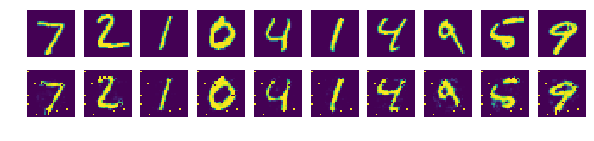

In [24]:
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))
for i in range(sample_size):
 ax[0][i].set_axis_off()
 ax[1][i].set_axis_off()
 ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28))) #imshow - 2차원으로 나워서 보여줘야함
 ax[1][i].imshow(np.reshape(samples[i], (28,28)))   #samples[i] - 예측 데이터

plt.show()

### 암호화, 비정상 거래 검출 등 - 에 사용됨